# Objectif:

Le but de ce notebook est de réunir à la fois la prédiction des variables et de la template, nous allons donc successivement appeler les notebooks, entrainer les deux modeles, en récupérant des fonctions d'encodage. 

Enfin pour tester le modele, nous allons lui donner des codes SBT aléatoires parmis notre base de données, puis prédire une template, des variables et les rassembler. 

# Pre requis :

-Avoir un compte goole

-Avoir généré les données comptatibles avec google colab, une doc est disponible

-Avoir créer un repository dans notre drive et y avoir mit nos 3 notebooks ainsi que nos données 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import os
from collections import Counter

**Importation du Drive**, pour cela il faut cliquer sur le lien qui apparait ci dessous, puis se connecter à son compte google, copier le code généré et le coller dans la zone prévue à cet effet dans la cellule suivante. 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Il faut ensuite indiquer à notre prorgamme dans quel repository nous voulons récupérer nos codes python à importer. Une fois connecté au drive, dans l'onglet **fichier** à gauche, on peut accéder a notre **drive**, il faut chercher l'iemplacement de nos fichiers, puis cliquer sur les **3 petits points** a coté du repository, puis cliquer sur **copier le chemin d'acces**, c'est ce chemin que nous allons copier dans la cellule suivante. 

In [3]:
%cd "/content/drive/MyDrive/Colab Notebooks/SII/V2 Colab"

/content/drive/MyDrive/Colab Notebooks/SII/V2 Colab


In [4]:
#dir_to_template = "/content/drive/MyDrive/Colab Notebooks/STAGE/V3/V2_template_attention.ipynb"
#dir_to_variables = "/content/drive/MyDrive/Colab Notebooks/STAGE/V3/V2_variables_attention.ipynb"

In [5]:
#pour importer des notebooks
!pip install import-ipynb 

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-py3-none-any.whl size=2975 sha256=cc14a76ea052a146b720e822f97c94f923958ef0efe4c27c5bde634af5ecd136
  Stored in directory: /root/.cache/pip/wheels/b1/5e/dc/79780689896a056199b0b9f24471e3ee184fbd816df355d5f0
Successfully built import-ipynb


L'entrainement se fait lorsque l'on appelle ces fichiers python, il peut prendre environ 4 ou 5h lorsqu'on entraine le modele avec respectivement 5 et 25 epochs pour template et variables sur 5000 fichiers : 

In [6]:
import import_ipynb

Importation et entrainement de V2_template_attention



importing Jupyter notebook from V2_template_attention.ipynb
Number of function/Foler =  5000
Get the bdd and sbt list via the bdd.txt & sbt.txt
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 256, 256)     65536       input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 256, 256)

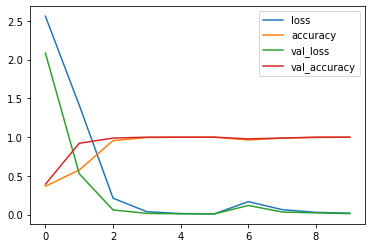

In [7]:
import V2_template_attention

Importation et entrainement de V2_variables_attention


importing Jupyter notebook from V2_variables_attention.ipynb
Number of function/Foler =  5000
Get the bdd and sbt list via the bdd.txt & sbt.txt

Training of the model ... 

Epoch 1/25
29/29 [==============================] - 68s 2s/step - loss: 2.9351 - accuracy: 0.3006 - val_loss: 1.9151 - val_accuracy: 0.4525
Epoch 2/25
29/29 [==============================] - 51s 2s/step - loss: 1.4393 - accuracy: 0.6223 - val_loss: 1.0832 - val_accuracy: 0.6944
Epoch 3/25
29/29 [==============================] - 51s 2s/step - loss: 0.8920 - accuracy: 0.7363 - val_loss: 0.8250 - val_accuracy: 0.7377
Epoch 4/25
29/29 [==============================] - 51s 2s/step - loss: 0.7539 - accuracy: 0.7575 - val_loss: 0.7433 - val_accuracy: 0.7571
Epoch 5/25
29/29 [==============================] - 51s 2s/step - loss: 0.7048 - accuracy: 0.7733 - val_loss: 0.7351 - val_accuracy: 0.7522
Epoch 6/25
29/29 [==============================] - 52s 2s/step - loss: 0.6662 - accuracy: 0.7775 - val_loss: 0.6570 - val_acc

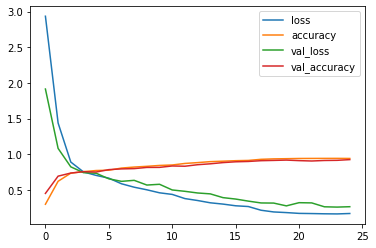

In [8]:
import V2_variables_attention

Nos modèles sont entrainés et sauvergardés, dans le repository du projet, des fichiers avec l'extension .h5 devraient etre apparut.

In [ ]:
#on va appeler le fichier V2_template_attention :
#from V2_template_attention import return_generated_template,return_bdd_sbt_and_num_folder,return_txt_trous_unique, encode_unique

In [ ]:
# On va appeler le fichier V2_variables_attention :
#from ipynb.fs.full.V2_variables_attention import return_variables_unique,encode_unique_var,return_generated_var

# Pré processing

Je donne un code SBT.

1 ) Template :
- transforme en texte a trous
- encode le texte à trous
- passe le texte à trou au modèle et il récupere la prédiction du modele

2 ) Variables 
- récupere les variables et stocke dans des 'phrases'
- encode les phrases
- récupere les predictions du modele

In [ ]:
bdd,test,num_folder = V2_template_attention.return_bdd_sbt_and_num_folder()

In [ ]:
def generate_template(code):
    txt_trous = V2_template_attention.return_txt_trous_unique(code) # transformation du SBT en "texte à trous"*
    encoded = V2_template_attention.encode_unique(txt_trous) # on encode ce texte à trous
    generated_template = V2_template_attention.return_generated_template(encoded) # generation de la template de BDD
    return generated_template

# "texte à trous" signifique qu'on supprime toute les variables du code puis qu'on les remplace par <oov>

In [ ]:
def generate_var(code):
    variables = V2_variables_attention.return_variables_unique(code) # extraction des variables du code SBT, et transformation en format var1/var2 ...
    encoded_var = V2_variables_attention.encode_unique_var(variables) # encodage de ces variables
    generated_var = V2_variables_attention.return_generated_var(encoded_var) # génération des variables de BDD
    return generated_var

In [ ]:
def return_prediction(code):
    template = generate_template(code) # generation de la template
    #print(' '.join(template))
    predicted_var = generate_var(code) # generation des variables
    #print(predicted_var)

    j=0
    # les oov sont remplacé par les variables :
    for i,word in enumerate (template):
        if word == '<oov>':
            template[i] = predicted_var[j]
            j=j+1    
    return ' '.join(template)


# Test avec des fichiers txt

In [ ]:
'''
from random import randint #permet de generer des valeurs aléatoires
path_to_test = "test_code_sbt/test_sbt_2.txt"


bdd_test = open(path_to_test,'r').read()
prediction = return_prediction(bdd_test)
print('\n\nPredicted BDD : \n',prediction)
file = open("results/result_2.txt","a") 
file.write(prediction) 
file.close
'''

'\nfrom random import randint #permet de generer des valeurs aléatoires\npath_to_test = "test_code_sbt/test_sbt_2.txt"\n\n\nbdd_test = open(path_to_test,\'r\').read()\nprediction = return_prediction(bdd_test)\nprint(\'\n\nPredicted BDD : \n\',prediction)\nfile = open("results/result_2.txt","a") \nfile.write(prediction) \nfile.close\n'

# Test avec des données aléatoires

In [ ]:
from random import randint #permet de generer des valeurs aléatoires

for i in range(3):
    a = randint(0,num_folder)
    print('\n\nPredicted BDD : \n',return_prediction(test[a]))
    print('\nExpected BDD : \n', bdd[a],'\n\n')



Predicted BDD : 
  the Fonction_1704     # Check the result to True   Scenario: bdd_Fonction_1704_1     Given y = -1 and e = -1     When i call Fonction_1704     Then the result should be True    # Check the result to False   Scenario: bdd_Fonction_1704_2     Given y = -12 and e = 3     When i call Fonction_1704     Then the result should be False 

Expected BDD : 
 Feature: Check the Fonction_1704     # Check the result to True   Scenario: bdd_Fonction_1704_1     Given y = -10 and e = 19     When i call Fonction_1704     Then the result should be True    # Check the result to False   Scenario: bdd_Fonction_1704_2     Given y = 12 and e = -2     When i call Fonction_1704     Then the result should be False  




Predicted BDD : 
  the Fonction_1414     # Check the result to True   Scenario: bdd_Fonction_1414_1     Given l = -1 and d = -13     When i call Fonction_1414     Then the result should be True    # Check the result to False   Scenario: bdd_Fonction_1414_2     Given l = -12 a